# Analisi Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Membaca file CSV
file_path = "/content/sample_data/mental_health_diagnosis_treatment_.csv"  # Sesuaikan dengan lokasi file
data = pd.read_csv(file_path)

In [4]:
# 1. Melihat ukuran dataset
print(f"Jumlah baris dan kolom: {data.shape}")

Jumlah baris dan kolom: (500, 17)


In [5]:
# 2. Informasi dataset
print("\nInformasi dataset:")
print(data.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  

In [6]:
# 3. Memeriksa data hilang
print("\nData hilang per kolom:")
print(data.isnull().sum())


Data hilang per kolom:
Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64


In [7]:
# 4. Statistik deskriptif
print("\nStatistik deskriptif:")
print(data.describe(include='all'))


Statistik deskriptif:
        Patient ID         Age Gender            Diagnosis  \
count   500.000000  500.000000    500                  500   
unique         NaN         NaN      2                    4   
top            NaN         NaN   Male  Generalized Anxiety   
freq           NaN         NaN    266                  135   
mean    250.500000   38.708000    NaN                  NaN   
std     144.481833   12.712433    NaN                  NaN   
min       1.000000   18.000000    NaN                  NaN   
25%     125.750000   28.000000    NaN                  NaN   
50%     250.500000   38.000000    NaN                  NaN   
75%     375.250000   50.000000    NaN                  NaN   
max     500.000000   60.000000    NaN                  NaN   

        Symptom Severity (1-10)  Mood Score (1-10)  Sleep Quality (1-10)  \
count                500.000000         500.000000            500.000000   
unique                      NaN                NaN                   NaN   
top 

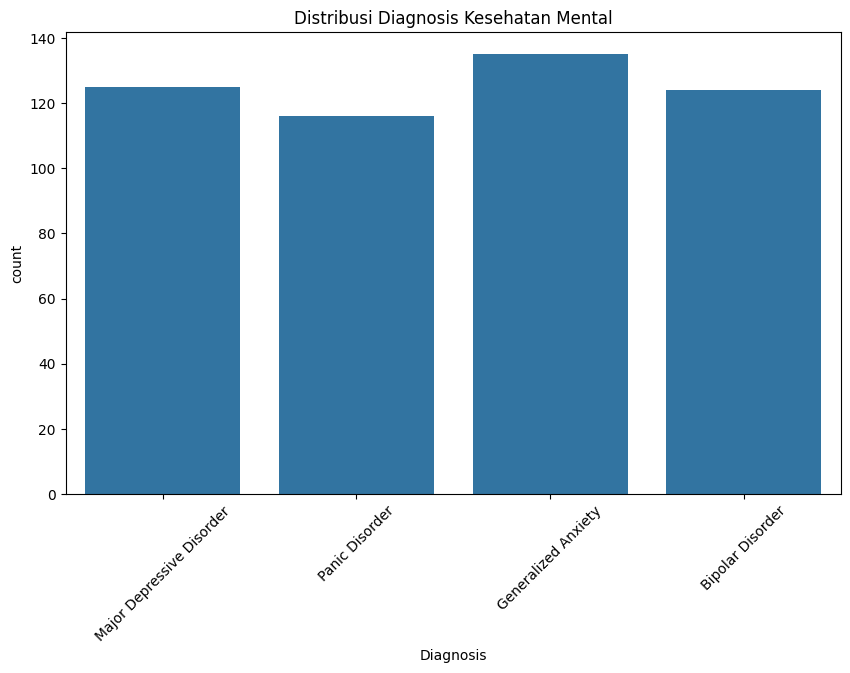

In [8]:
# 5. Visualisasi distribusi diagnosis kesehatan mental
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Diagnosis')  # Ganti 'Diagnosis' dengan nama kolom terkait
plt.title('Distribusi Diagnosis Kesehatan Mental')
plt.xticks(rotation=45)
plt.show()

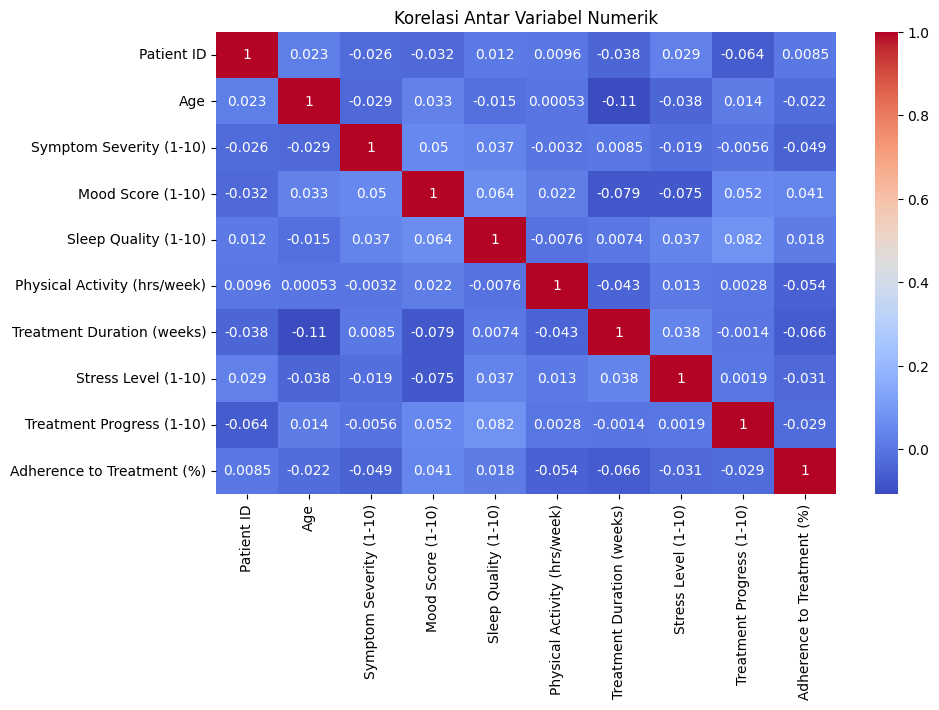

In [9]:
# Memilih kolom numerik saja
numeric_data = data.select_dtypes(include=['number'])

# Mengecek apakah ada kolom numerik
if not numeric_data.empty:
    # 6. Korelasi antar variabel numerik
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
    plt.title('Korelasi Antar Variabel Numerik')
    plt.show()
else:
    print("Tidak ada kolom numerik dalam dataset.")

Visualisasi Data

<ipython-input-10-1e73d5c9f6b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='viridis')


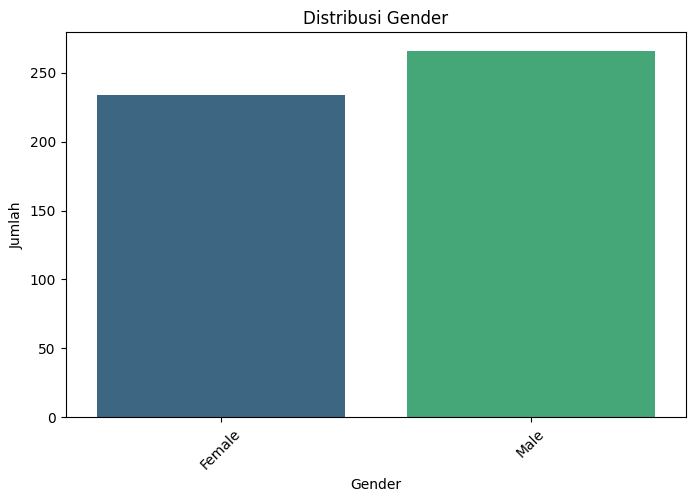

In [10]:
# 1. Visualisasi Distribusi Kategori (Contoh: Gender)
if 'Gender' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x='Gender', palette='viridis')
    plt.title('Distribusi Gender')
    plt.xlabel('Gender')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

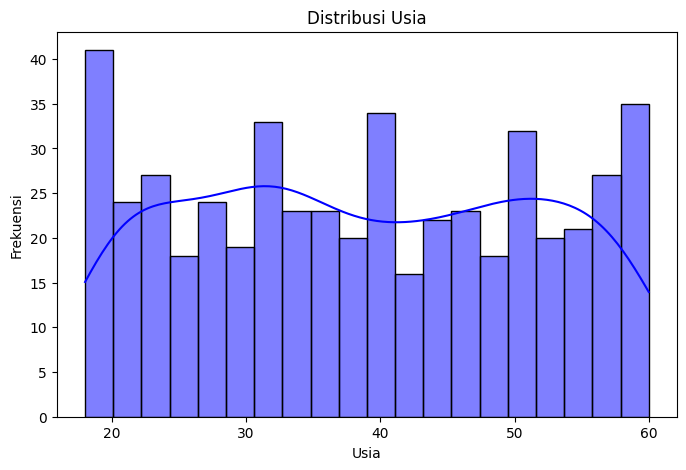

In [11]:
# 2. Visualisasi Distribusi Numerik (Contoh: Age)
if 'Age' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x='Age', bins=20, kde=True, color='blue')
    plt.title('Distribusi Usia')
    plt.xlabel('Usia')
    plt.ylabel('Frekuensi')
    plt.show()

<ipython-input-12-93bca40ea91c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Age', palette='Set2')


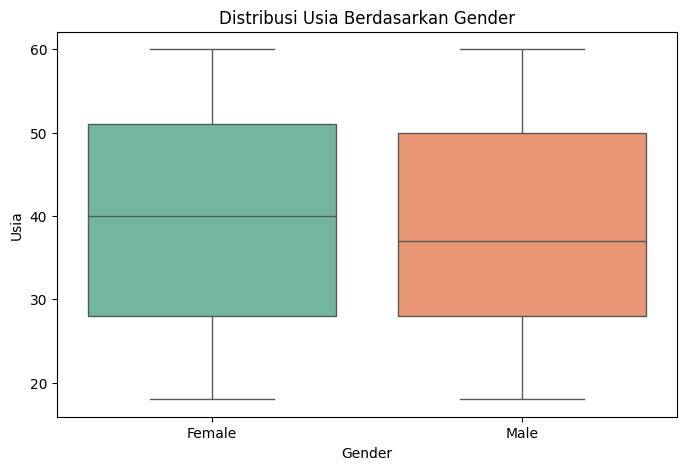

In [12]:
# 3. Perbandingan Kategori vs Numerik (Contoh: Gender vs Age)
if 'Gender' in data.columns and 'Age' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x='Gender', y='Age', palette='Set2')
    plt.title('Distribusi Usia Berdasarkan Gender')
    plt.xlabel('Gender')
    plt.ylabel('Usia')
    plt.show()

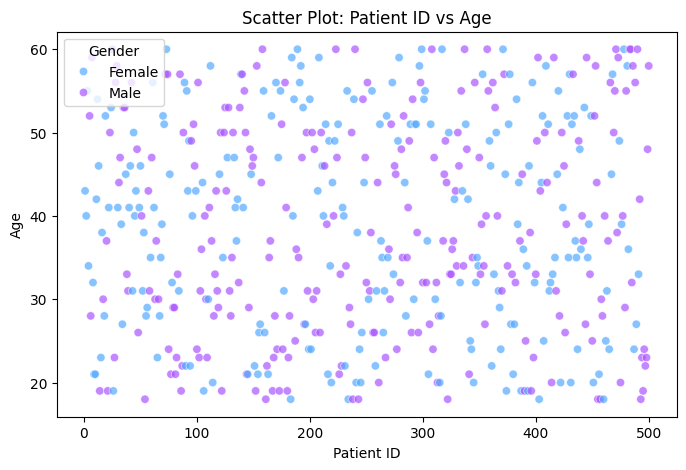

In [13]:
# 4. Scatter Plot Antar Variabel Numerik (Contoh: Age vs Another Numerical Column)
numeric_columns = numeric_data.columns.tolist()
if len(numeric_columns) > 1:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=numeric_columns[0], y=numeric_columns[1], hue='Gender', palette='cool', alpha=0.7)
    plt.title(f'Scatter Plot: {numeric_columns[0]} vs {numeric_columns[1]}')
    plt.xlabel(numeric_columns[0])
    plt.ylabel(numeric_columns[1])
    plt.legend(title='Gender')
    plt.show()

# Proporsi Setiap Kategori dalam Kolom

Proporsi Gender (%):
Gender
Male      53.2
Female    46.8
Name: proportion, dtype: float64


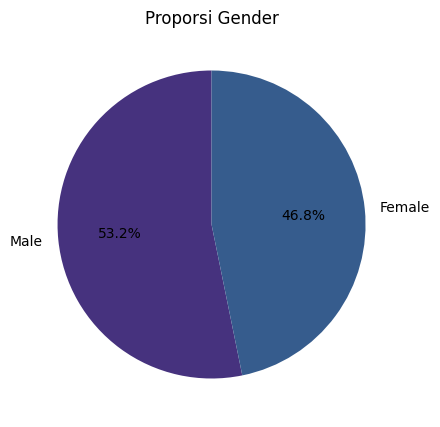

In [14]:
# Menghitung proporsi kategori (contoh: Gender)
if 'Gender' in data.columns:
    gender_counts = data['Gender'].value_counts(normalize=True) * 100
    print("Proporsi Gender (%):")
    print(gender_counts)

    # Visualisasi
    plt.figure(figsize=(8, 5))
    gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
    plt.title('Proporsi Gender')
    plt.ylabel('')
    plt.show()


# Outlier Detection dengan Boxplot

<ipython-input-15-e6a26507fcc2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y='Age', palette='Set2')


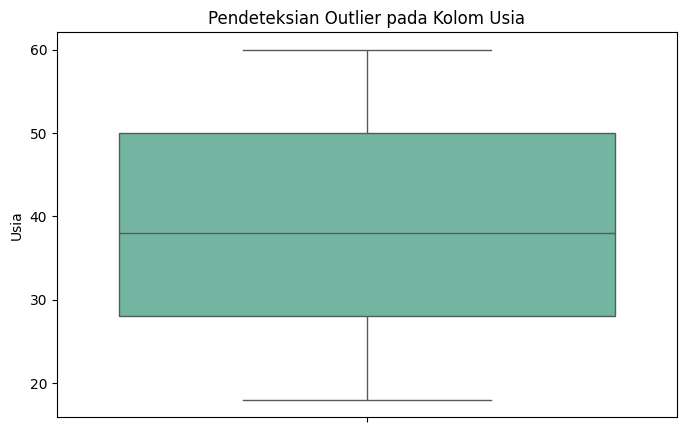

In [15]:
# Mendeteksi outlier pada kolom numerik
if 'Age' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, y='Age', palette='Set2')
    plt.title('Pendeteksian Outlier pada Kolom Usia')
    plt.ylabel('Usia')
    plt.show()


# Analisis Missing Values

Persentase Missing Values (%):
Patient ID                      0.0
Age                             0.0
Gender                          0.0
Diagnosis                       0.0
Symptom Severity (1-10)         0.0
Mood Score (1-10)               0.0
Sleep Quality (1-10)            0.0
Physical Activity (hrs/week)    0.0
Medication                      0.0
Therapy Type                    0.0
Treatment Start Date            0.0
Treatment Duration (weeks)      0.0
Stress Level (1-10)             0.0
Outcome                         0.0
Treatment Progress (1-10)       0.0
AI-Detected Emotional State     0.0
Adherence to Treatment (%)      0.0
dtype: float64


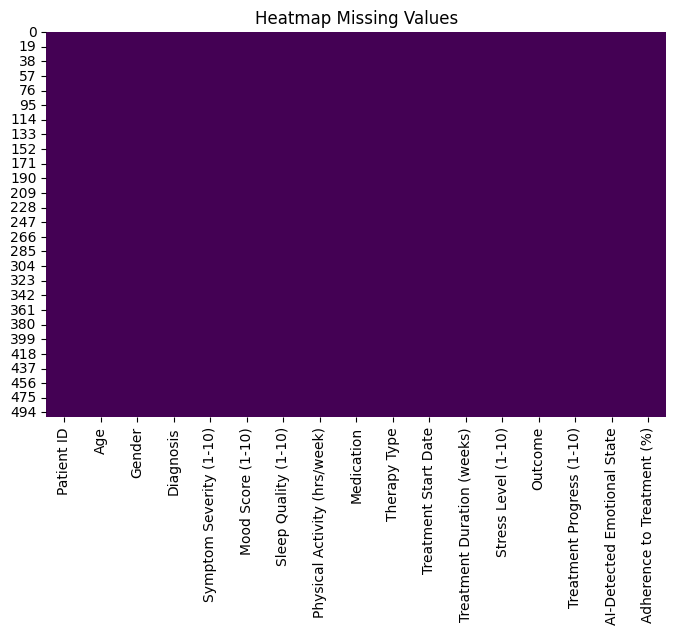

In [16]:
# Analisis nilai yang hilang
missing_values = data.isnull().mean() * 100
print("Persentase Missing Values (%):")
print(missing_values)

# Visualisasi Missing Values
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title('Heatmap Missing Values')
plt.show()
